# Restaurant Revenue Prediction

This dataset provided by kaggle consists of only 137 training samples and 10,000 testing samples. The sample consists of 
42 features and revenue value as the respose variable.
The dataset consists of continous labels with some continuous and few categorical features.
The below notebook contains:

1) Data Exploration

2) Feature Engineering

3) Model Selection

4) Performance Evaluation

# Exploring data for detailed information

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the data and viewing the first 10 data in the training set

In [2]:
# Reading data from file as datarame
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [3]:
# View of first 6 samples from training data
train.head(6)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0


# Info of the data

In [4]:
print("**************** Train *****************")
train.info()
print("**************** Test *****************")
test.info()

**************** Train *****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137

In [5]:
print("**************** Identifying categorical and numerical variables *****************")
train.columns

**************** Identifying categorical and numerical variables *****************


Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

# Checking for Missing and duplicate values

In [6]:
print("**************** Check for Train Duplicates *****************")
train.duplicated().sum()
print("**************** Check for Test Duplicates  *****************")
test.duplicated().sum()

**************** Check for Train Duplicates *****************
**************** Check for Test Duplicates  *****************


0

No duplicate data. Now let's check for any missing datapoints

In [7]:
# checking missing data
train.isnull().sum().sum()

0

Great! No missing values

In [8]:
## View Integer type columns
train.describe(include=[np.number])

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
## Categorical Columns
train.describe(include=['O'])

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,01/07/2000,İstanbul,Big Cities,FC
freq,2,50,78,76


So we have 4 categorical features and 39 numerical columns

# Data Statistics

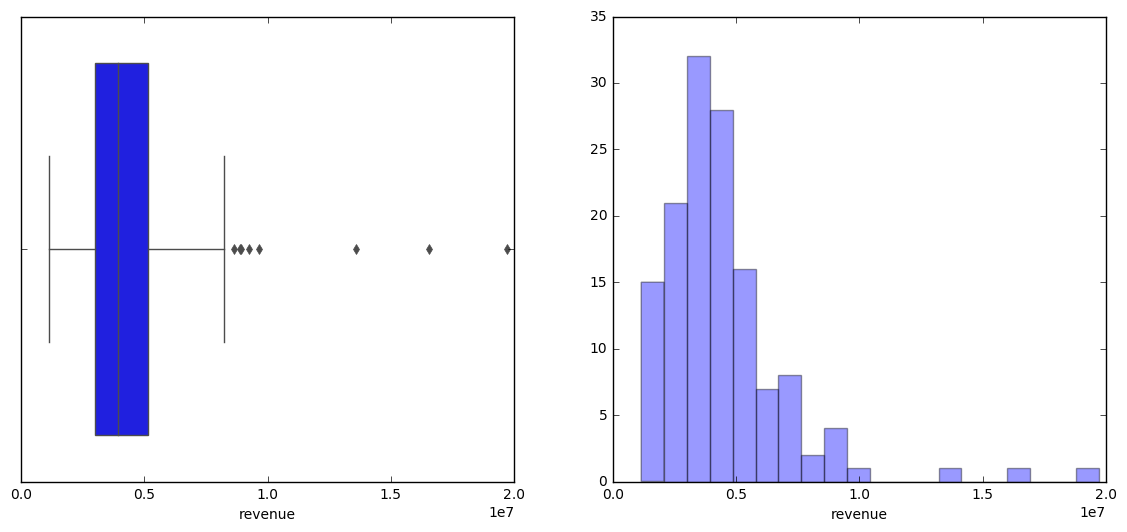

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train.revenue)
plt.subplot(1,2,2)
sns.distplot(train.revenue, bins=20, kde=False)
plt.show()

# Identifying potential outliers

In [11]:
rev_stat=train.revenue.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64
The upper and lower bounds for suspected outliers are -252282.5 and 8417985.5


# Checking the potential outliers

In [12]:
#potential outliers above 8417985.5
train[train.revenue>8417985.5]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
24,24,09/20/2009,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,...,2.0,5,5,4,4,4,4,5,2,8904084.0
49,49,04/01/2008,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,...,7.5,0,0,0,0,0,0,0,0,8630682.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9652350.0
116,116,03/30/2012,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,8894598.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0


# Splitting the opening date by month and year

In [13]:
# Splitting 01/31/2018 as 01, 31, 2018
train_date=train['Open Date'].str.split('/', n = 2, expand = True)
train['month']=train_date[0]
train['days']=train_date[1]
train['year']=train_date[2]

test_date=test['Open Date'].str.split('/', n = 2, expand = True)
test['month']=test_date[0]
test['days']=test_date[1]
test['year']=test_date[2]
train['month'].head(5)

0    07
1    02
2    03
3    02
4    05
Name: month, dtype: object

# Identifying correlations between Revenues and other features

In [14]:
# Method to plot correlation between Revenue and a categorical feature
def featureCatPlot(col):
    plt.figure(figsize=(10,4))
    i=1
    if not train[col].dtype.name=='int64' and not train[col].dtype.name=='float64':
        plt.subplot(1,2,i)
        sns.boxplot(x=col,y='revenue',data=train)
        plt.xticks(rotation=60)
        plt.ylabel('Revenue')
        i+=1 
        plt.subplot(1,2,i)
        mean=train.groupby(col)['revenue'].mean()
        level=mean.sort_values().index.tolist()
        train[col]=train[col].astype('category')
        train[col].cat.reorder_categories(level,inplace=True)
        train[col].value_counts().plot()
        plt.xticks(rotation=60)
        plt.xlabel(col)
        plt.ylabel('Counts')       
        plt.show()

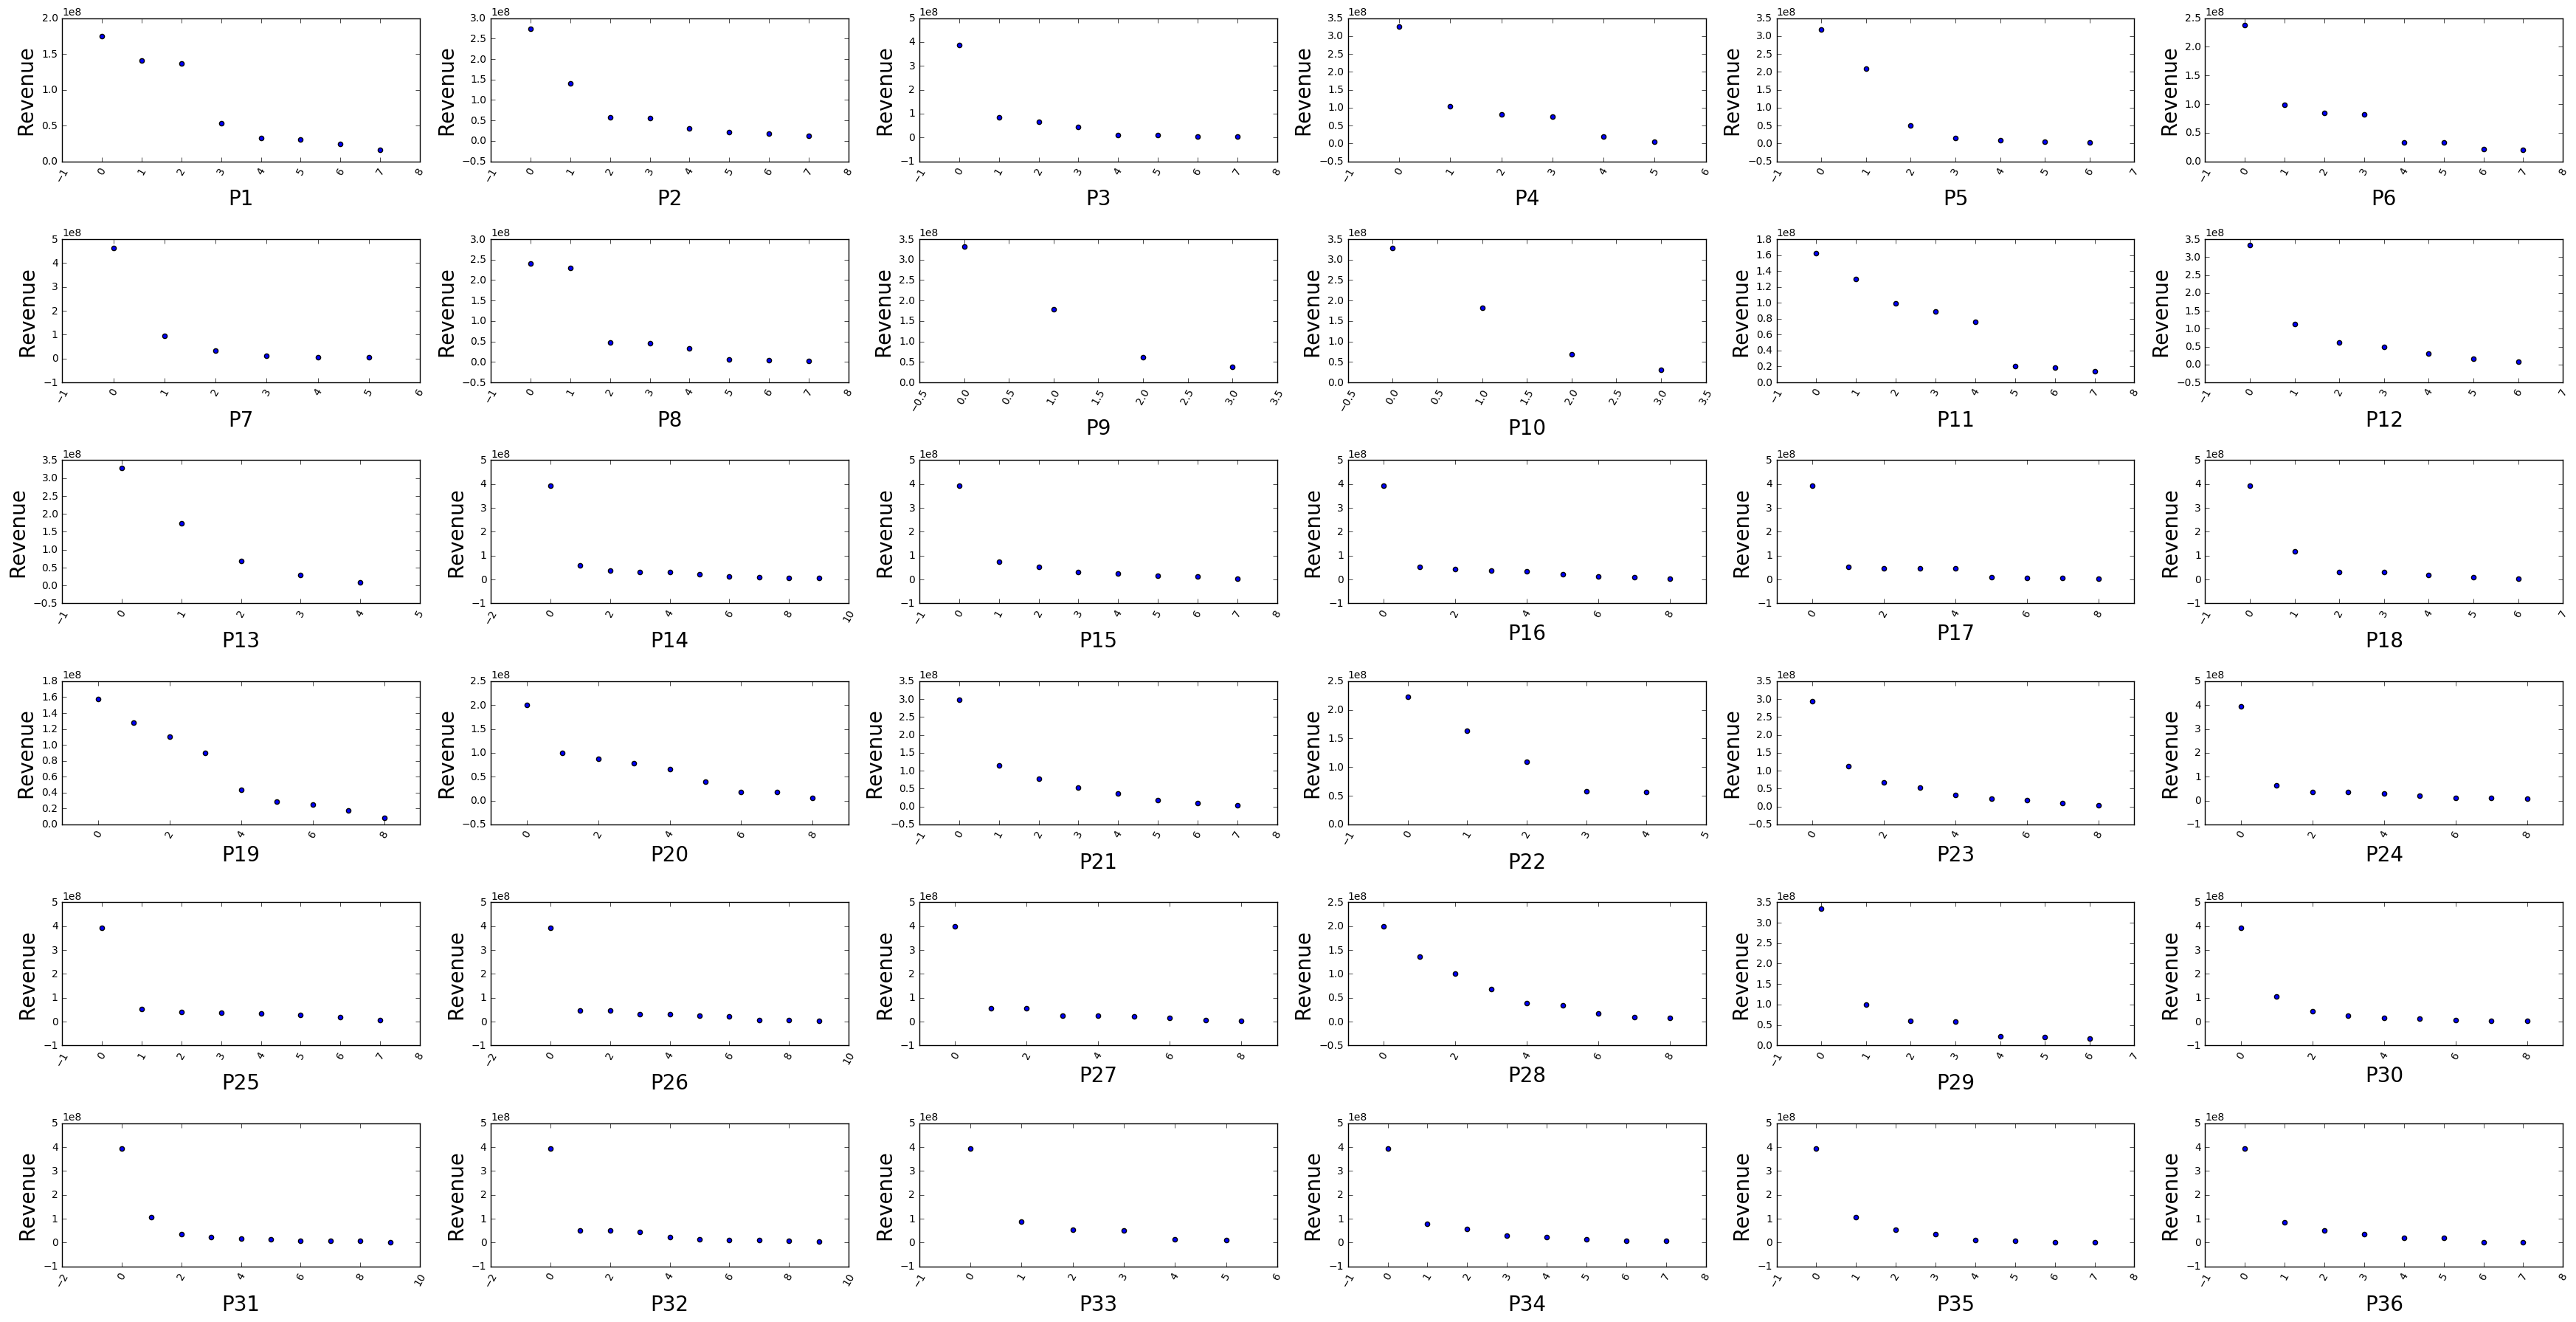

In [15]:
# Method to plot correlation between revenue and continuous feature
def numFeaturePlot():
    features=(train.loc[:,'P1':'P37']).columns.tolist()
    plt.figure(figsize=(35,18))
    j=1
    while j<len(features):
        col=features[j-1]
        plt.subplot(6,6,j)
        sorted_grp = train.groupby(col)["revenue"].sum().sort_values(ascending=False).reset_index()
        x_val = sorted_grp.index
        y_val = sorted_grp['revenue'].values
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=60)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Revenue', fontsize=20)
        j+=1    
    plt.tight_layout()
    plt.show()
numFeaturePlot()    

It is quite visible that some P variables is not making a strong correlation with respect to Revenue. Additionally, some of 
them has less number of datapoints. But we found that there are no missing values. This means these values could be 0.

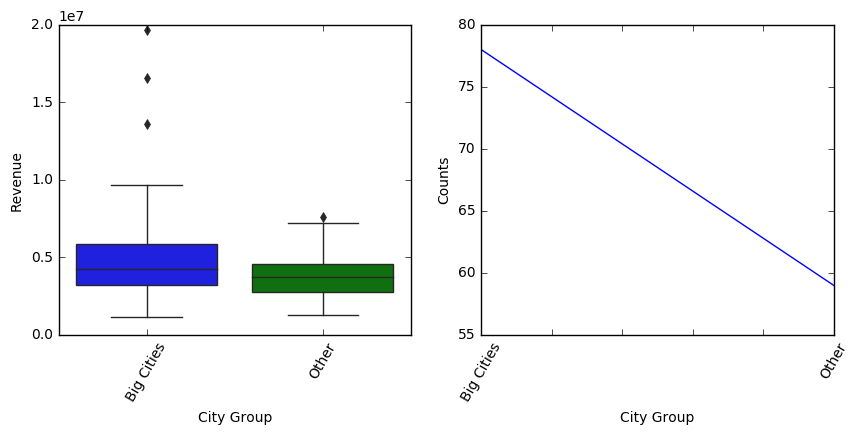

In [17]:
featureCatPlot('City Group')

Strong correlation betwen City Group and Revenue. 

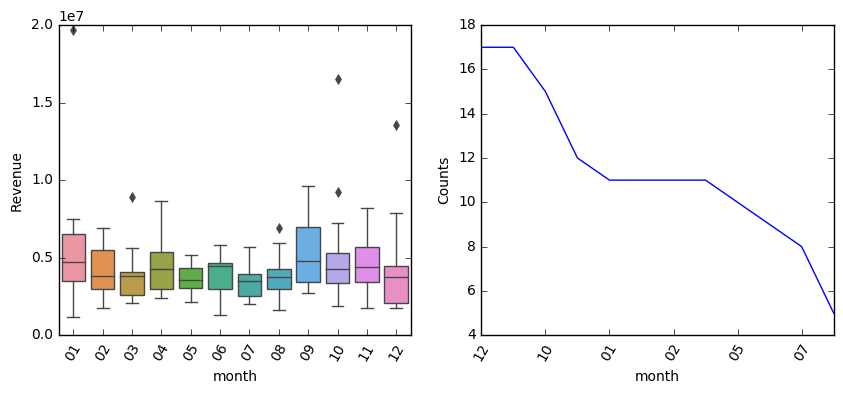

In [18]:
featureCatPlot('month')

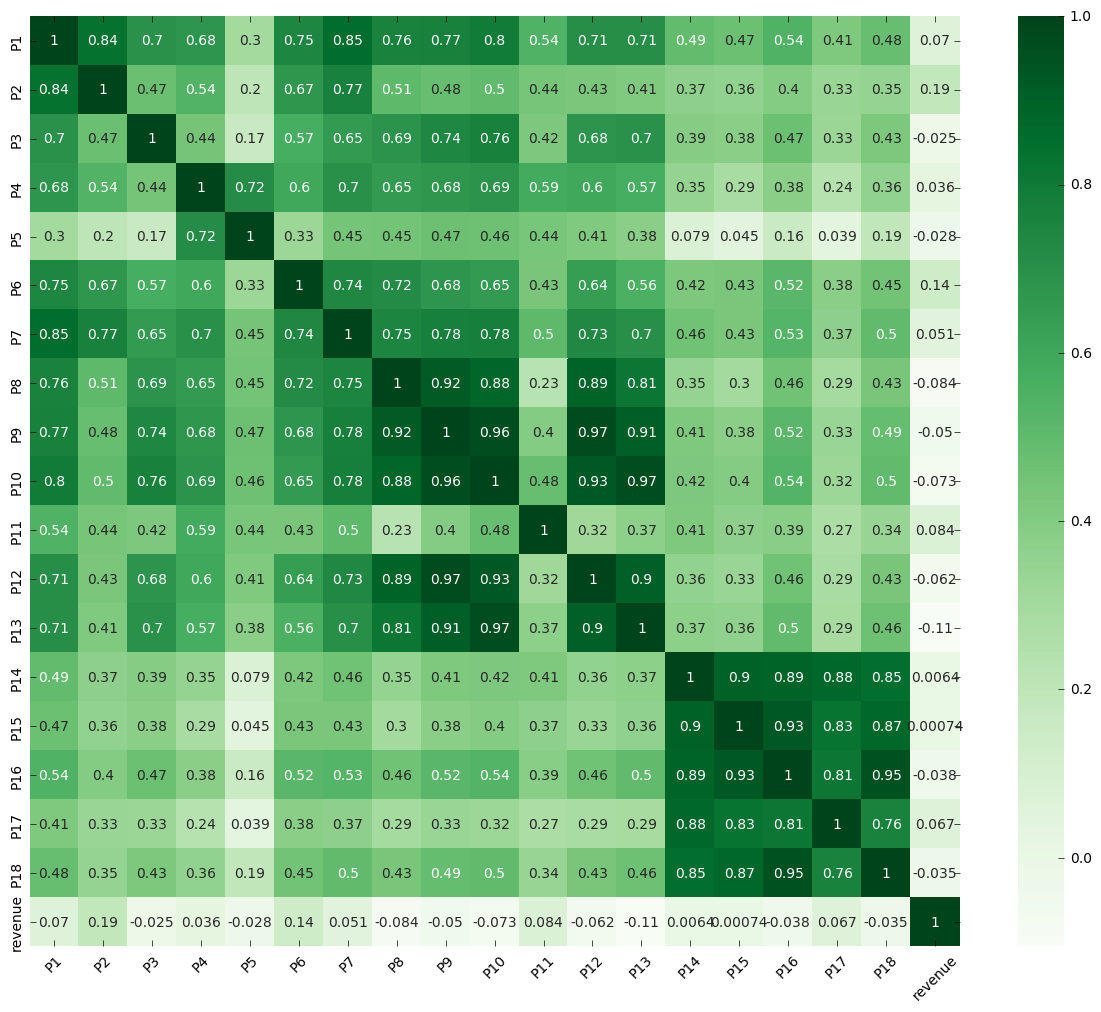

In [19]:
# Plotting heatmap between revenue and P variables
fig=plt.figure(figsize=(15,12))
features=(train.loc[:,'P1':'P18']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

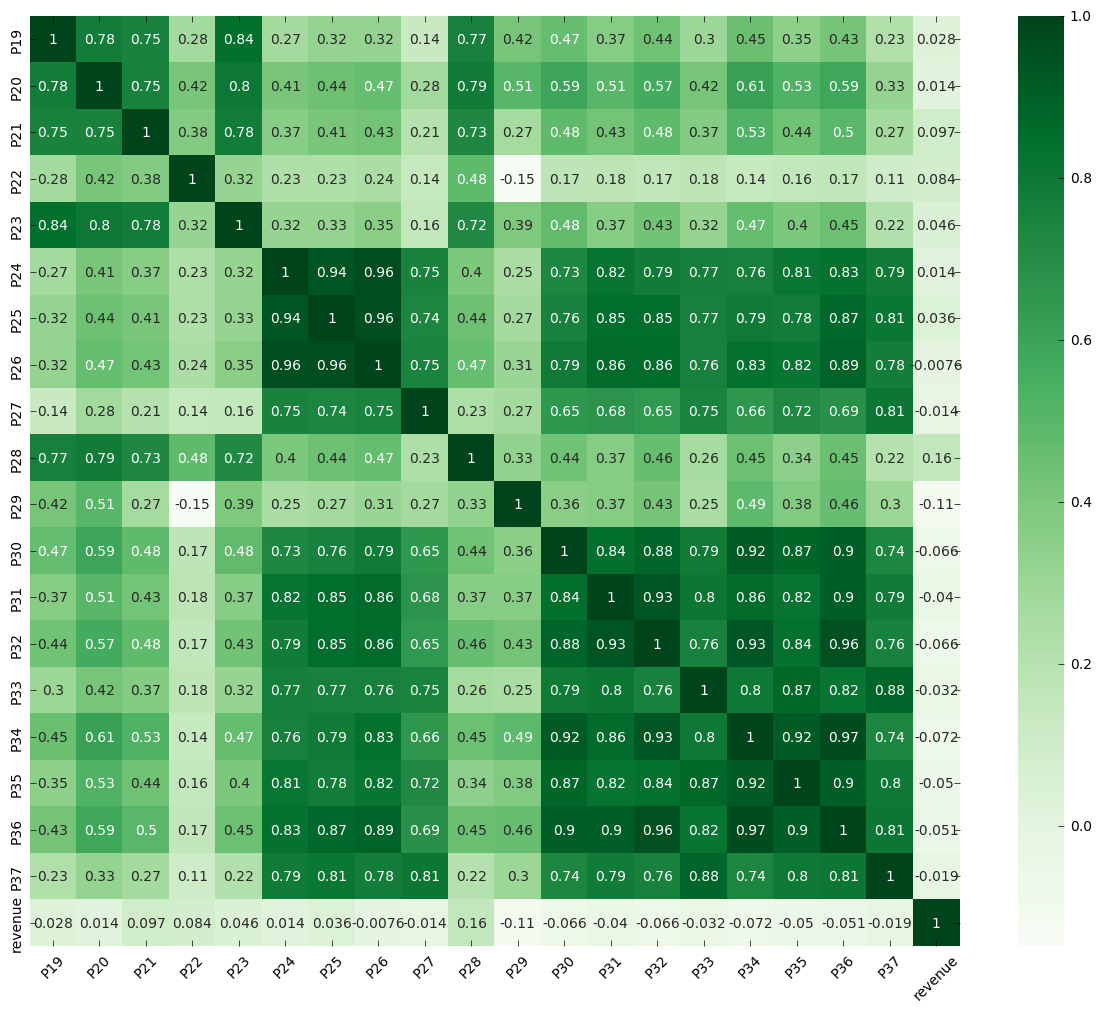

In [20]:
fig=plt.figure(figsize=(15,12))
features=(train.loc[:,'P19':'P37']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()

From the above plots it is quite visible that the correlation between revenue and the P's variables are quite weak. Either these
values act as a noise or they need transformation. Let's observe the transformed data correlation.

# Feature Engineering

Transforming the P features to its square root form. After tranformation, the features are further standardized by scaling them

In [21]:
import numpy as np
# Square root of the P variables
ntrain= np.sqrt(train.loc[:,'P1':'P37'])
ntest= np.sqrt(test.loc[:,'P1':'P37'])
ntrain.head(8)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2.000000,2.236068,2.000000,2.000000,1.414214,1.414214,2.236068,2.000000,2.236068,2.236068,...,1.414214,1.732051,2.236068,1.732051,2.000000,2.236068,2.236068,2.000000,1.732051,2.000000
1,2.000000,2.236068,2.000000,2.000000,1.000000,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.732051,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.414214,2.000000,1.414214,2.236068,1.414214,1.732051,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.449490,2.121320,2.449490,2.449490,2.000000,2.000000,3.162278,2.828427,3.162278,3.162278,...,1.581139,2.738613,5.000000,3.464102,3.162278,2.449490,4.242641,3.464102,3.464102,2.449490
4,1.732051,2.000000,1.732051,2.000000,1.414214,1.414214,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,2.236068,1.000000,1.732051,1.414214,1.732051,2.000000,1.732051,1.732051
5,2.449490,2.449490,2.121320,2.738613,2.828427,3.162278,3.162278,2.828427,2.828427,2.828427,...,2.738613,2.236068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1.414214,1.732051,2.000000,2.000000,1.000000,2.236068,2.236068,2.236068,2.236068,2.236068,...,1.000000,1.732051,2.000000,2.236068,1.414214,1.414214,1.732051,2.236068,2.000000,2.000000
7,2.000000,2.236068,2.000000,2.236068,1.414214,1.732051,2.236068,2.000000,2.000000,2.000000,...,1.732051,1.414214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
from sklearn.preprocessing import StandardScaler
# Scaling the data using StandardScaler. This will normalize the datapoints by subtracting from mean 
# and dividing by standard deviation
class DataFrameScale:
    def __init__(self,df):
        self.df =df
    def dataScaling(self):
        x_cols= self.df.columns    
        scaler= StandardScaler()      
        df= scaler.fit_transform(self.df)
        df=pd.DataFrame(df, columns = x_cols)
        return df
scal_train = DataFrameScale(ntrain)
ntrain = scal_train.dataScaling()
scal_test = DataFrameScale(ntest)
ntest = scal_test.dataScaling()
ntrain.head(5)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0.154045,0.446850,-0.201271,-0.333476,0.124617,-0.654496,-0.067010,-0.626121,-0.199544,-0.225338,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,0.154045,0.446850,-0.201271,-0.333476,-1.005005,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,-0.783627,-0.166776,-2.238525,0.677030,0.124617,-0.046356,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,0.873546,0.148580,1.361969,1.590598,1.722145,0.466330,1.724665,1.553030,2.421213,2.388412,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,-0.274863,-0.166776,-1.133147,-0.333476,0.124617,-0.654496,-0.067010,-0.005152,-0.199544,-0.225338,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [23]:
train = train[train.columns[train.columns.isin(['Id','City','City Group','Type','month','days','year','revenue'])]]
train = pd.concat([train,ntrain],axis=1)
test = test[test.columns[test.columns.isin(['Id','City','City Group','Type','month','days','year'])]]
test = pd.concat([test,ntest],axis=1)
train.head(5)

,Id,City,City Group,Type,revenue,month,days,year,P1,P2,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,İstanbul,Big Cities,IL,5653753.0,07,17,1999,0.154045,0.446850,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,Ankara,Big Cities,FC,6923131.0,02,14,2008,0.154045,0.446850,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,Diyarbakır,Other,IL,2055379.0,03,09,2013,-0.783627,-0.166776,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,Tokat,Other,IL,2675511.0,02,02,2012,0.873546,0.148580,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,Gaziantep,Other,IL,4316715.0,05,09,2009,-0.274863,-0.166776,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


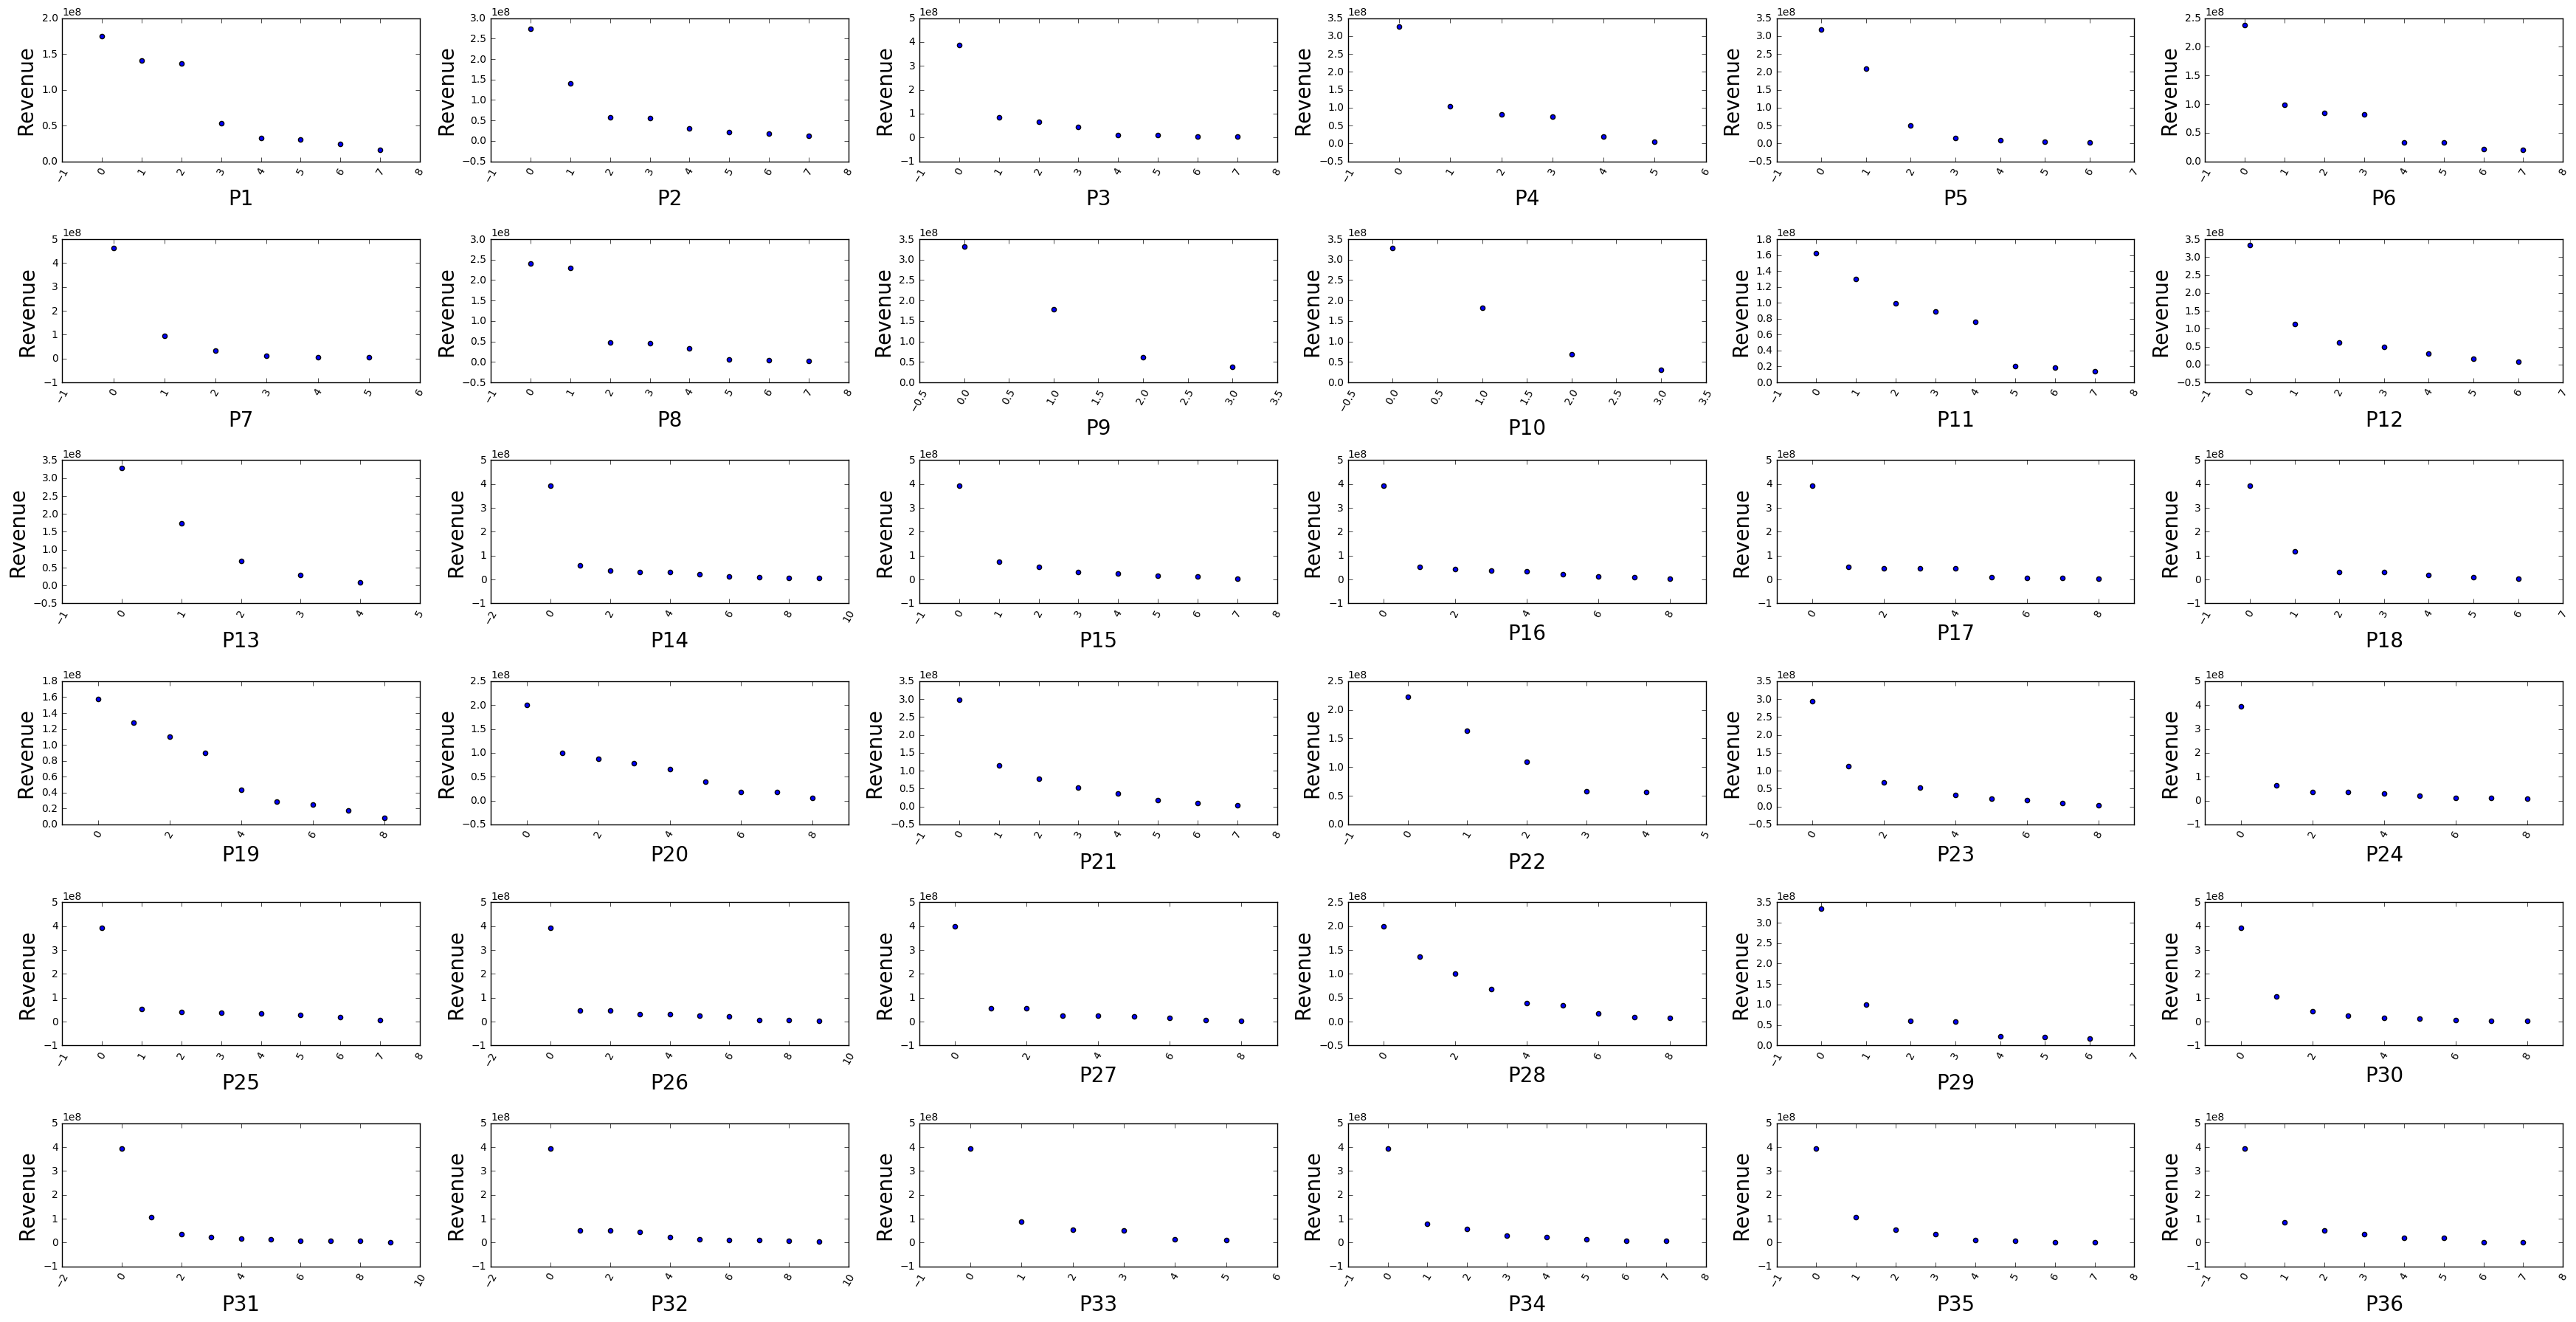

In [24]:
numFeaturePlot()

In [25]:
# Grouping the data by categorical feature and aggregating with respect to revenue
def group_features(col):
    city = train.groupby(col)['revenue'].agg(['size','count','min','max','mean']).sort_values(by='mean',ascending = False)
    city.columns = ['total rows','rows with revenue','min','max','average revenue']
    return city

In [26]:
city = group_features('City')
x = city.index[:10]
city_x = [x * 1.0 for x, _ in enumerate(x)]
y_tr = city['total rows'][:10]
y_rr = city['rows with revenue'][:10]
y_min = city['min'][:10]
y_max = city['max'][:10]
y_avgr = city['average revenue'][:10]
city.head(10)

,total rows,rows with revenue,min,max,average revenue
City,,,,,
İstanbul,50,50,1149870.0,19696939.0,5.577812e+06
Elazığ,1,1,5525735.0,5525735.0,5.525735e+06
Edirne,1,1,5444227.0,5444227.0,5.444227e+06
İzmir,9,9,1756069.0,9262754.0,5.287571e+06
Trabzon,2,2,4780607.0,5787594.0,5.284100e+06
Afyonkarahisar,1,1,4952497.0,4952497.0,4.952497e+06
Adana,3,3,3903884.0,6313221.0,4.894944e+06
Balıkesir,1,1,4758476.0,4758476.0,4.758476e+06
Kayseri,3,3,2544857.0,7201784.0,4.567576e+06


Plotting the revenues city-wise. From the above table it is quite visible that Istanbul has most number of rows. Let us visualize the min, 

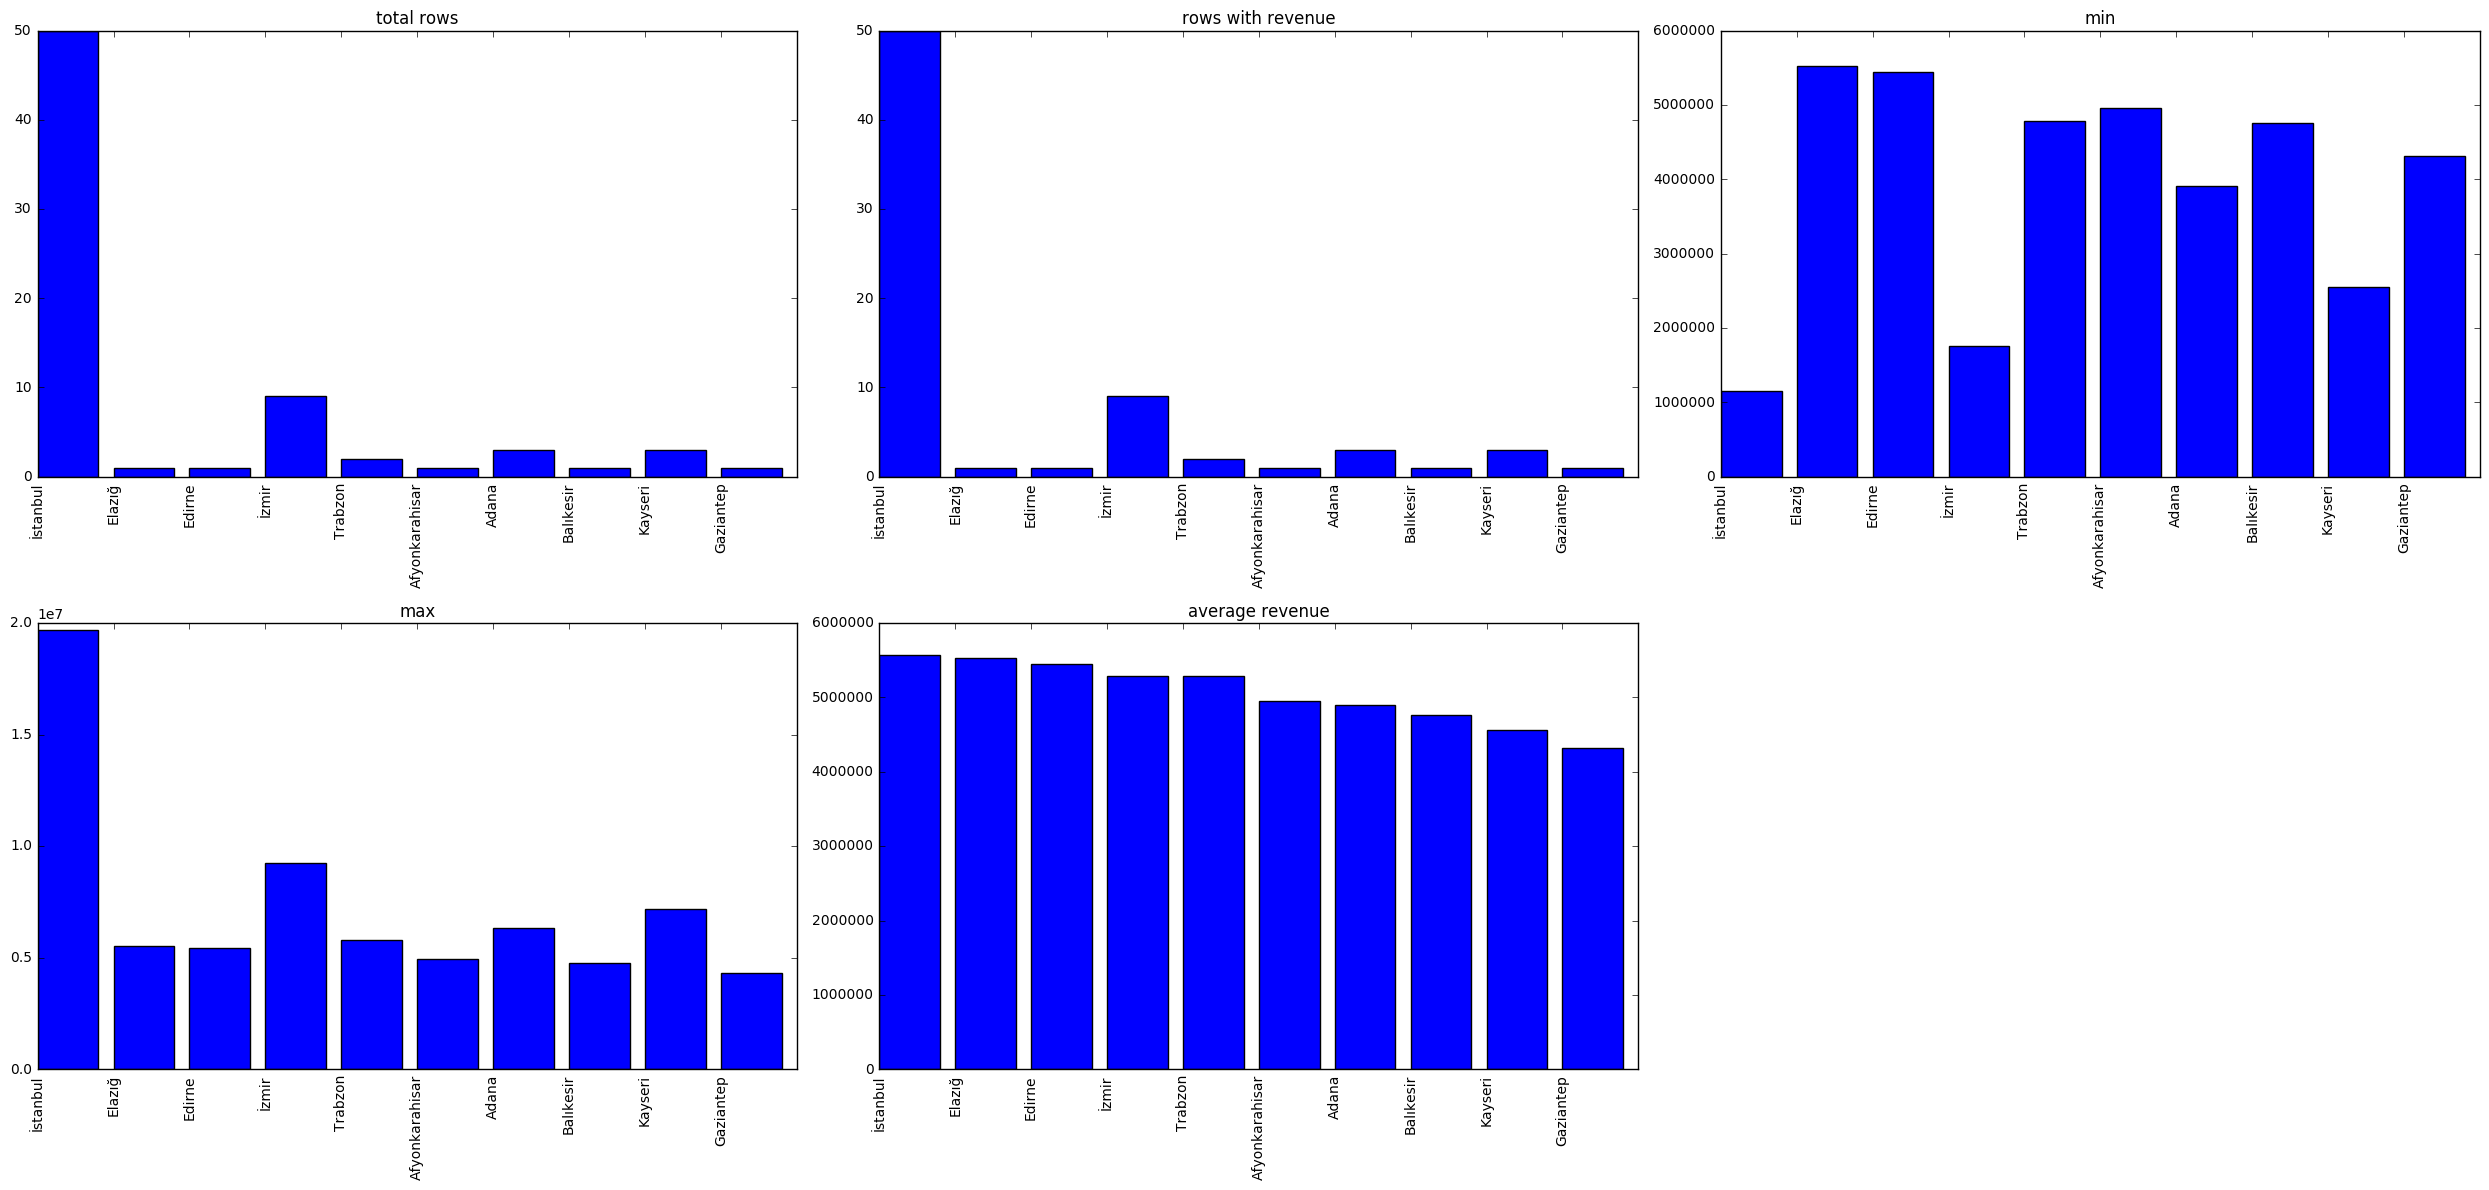

In [27]:
plt.figure(figsize=(25,12))

plt.subplot(2,3,1)
plt.bar(city_x,y_tr,tick_label=x)
plt.title('total rows')
plt.xticks(rotation=90)

plt.subplot(2,3,2)
plt.bar(city_x,y_rr,tick_label=x)
plt.title('rows with revenue')
plt.xticks(rotation=90)

plt.subplot(2,3,3)
plt.bar(city_x,y_min,tick_label=x)
plt.title('min')
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.bar(city_x,y_max,tick_label=x)
plt.title('max')
plt.xticks(rotation=90)

plt.subplot(2,3,5)
plt.bar(city_x,y_avgr,tick_label=x)
plt.title('average revenue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Model Selection and Performance Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
logisticRegr = LogisticRegression()

In [29]:
y_train = train.loc[:,'revenue']  #train target variable
x_train = train[train.columns[~train.columns.isin(['Open Date','revenue'])]]  #train features to be fit in model
x_test = test[test.columns[~test.columns.isin(['Open Date'])]]  #test features

In [30]:
x_train.head(5)

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,İstanbul,Big Cities,IL,07,17,1999,0.154045,0.446850,-0.201271,...,-0.517620,0.050993,0.959953,0.823025,0.848783,1.863596,1.039680,1.013553,0.728835,1.610808
1,1,Ankara,Big Cities,FC,02,14,2008,0.154045,0.446850,-0.201271,...,0.048149,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
2,2,Diyarbakır,Other,IL,03,09,2013,-0.783627,-0.166776,-2.238525,...,-1.254944,0.050993,-0.666273,-0.680541,-0.657091,-0.726484,-0.653264,-0.701287,-0.678804,-0.707522
3,3,Tokat,Other,IL,02,02,2012,0.873546,0.148580,1.361969,...,-0.220484,2.213252,2.970080,2.326591,1.723905,2.110807,2.558871,2.268904,2.136474,2.131841
4,4,Gaziantep,Other,IL,05,09,2009,-0.274863,-0.166776,-1.133147,...,-1.254944,0.050993,0.959953,0.187543,0.647034,0.911627,0.658085,1.013553,0.728835,1.300210


In [31]:
from sklearn.preprocessing import LabelEncoder
# Processing the categorical columns to provide vector form of feature
class DataFrameProcess:
    def __init__(self,df,col):
        self.df =df
        self.col=col
    def dataEncoding(self):
        if self.df[self.col].dtype.name == 'object' or self.df[self.col].dtype.name == 'category':
            le = LabelEncoder()
            self.df[self.col] = le.fit_transform(self.df[self.col])    


def data_transform(df):  
    for col in df.columns:
        data_prcs = DataFrameProcess(df,col)
        data_prcs.dataEncoding()  
data_transform(x_train) 
data_transform(x_test) 

C:\Users\purba\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
x_test.head(5)

,Id,City,City Group,Type,month,days,year,P1,P2,P3,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,38,1,1,0,21,16,-1.561347,-0.209338,-0.178779,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
1,1,27,1,2,2,17,16,-0.334710,-0.209338,-0.178779,...,-1.352940,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
2,2,3,0,1,9,29,18,-0.334710,-0.209338,-0.178779,...,-0.572591,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
3,3,26,1,2,4,5,18,-0.867283,-0.209338,-0.178779,...,-0.572591,0.107356,-0.650834,1.533622,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723
4,4,1,1,1,6,30,18,-0.867283,-0.209338,-0.178779,...,0.975726,0.107356,-0.650834,-0.656410,-0.653116,-0.699753,-0.635476,-0.675864,-0.665409,-0.673723


In [33]:
# Applying Logistic Regression
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

In [34]:
proba_val = logisticRegr.predict_proba(x_test)
proba_val

array([[1.97552024e-01, 1.02130993e-04, 8.17134939e-06, ...,
        4.59514032e-07, 3.64728894e-05, 5.52138261e-03],
       [1.35883492e-01, 6.01661773e-04, 4.86904041e-04, ...,
        2.29426017e-06, 7.82738709e-05, 2.11543772e-03],
       [3.89048866e-04, 1.70662874e-06, 1.45027583e-06, ...,
        1.05680248e-06, 2.69035273e-05, 3.50413415e-09],
       ...,
       [0.00000000e+00, 2.32686965e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.32560115e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.32558162e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [35]:
predictions

array([4491607., 4491607., 1999097., ..., 3939804., 3939804., 3939804.])

In [36]:
test_label=pd.read_csv('data/sampleSubmission.csv')  # test target
test_label.head(10)

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6
5,5,4453532.6
6,6,4453532.6
7,7,4453532.6
8,8,4453532.6
9,9,4453532.6


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
label_list=test_label['Prediction'].tolist()
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))

Root Mean squared error 540154.2182071231


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gbRegr = GradientBoostingRegressor(max_depth=3, random_state=42)
gbRegr.fit(x_train, y_train)
prediction_rr = gbRegr.predict(x_test)

In [42]:
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, prediction_rr))))

Root Mean squared error 1716897.2136114533


The winning solution have achieved RMSE of 1,727,811.485 using GBM but by using simple Logisitc Regression and scaling the 
features along with transformation reduced the RMSE to 540,154.218

# Conclusion and Future Work

Since the number of samples are very low in training samples and contains a large number of features comparatively, so here it is important to analyze the features carefully and engineer them well.
The model would surely perform better if we have more training samples but in case we have few more features then it might be important to reduce the dimension of the features else the model could overfit.
Some of the potential future work would be:

1) Try logarithmic transformation of the P variables

2) Reduce the dimension of the features using PCA

3) Try new models like SupportVectorRegressor